# 00. Decision Tree - Train-Test-Split

In this tutorial we are going to code Decision tree only using `numpy` and `panda`. 
There is a library `sklearn` available for all for machine learning algorithms but we are not using it.


**Example:** As a **marketing manager**, you want a set of customers who are most likely to purchase your product.  This is how you can save your marketing budget by finding your audience. As a **loan manager**, you need to identify risky loan applications to achieve a lower loan default rate. 

This process of classifying customers into a group of potential and non-potential customers or safe or risky loan applications is known as a **classification problem.**

Classification is a two-step process, `learning step and prediction step`. 

- In the learning step, the model is developed based on given training data. 
- In the prediction step, the model is used to predict the response for given data. 

**Decision Tree** is one of the easiest and popular classification algorithms to understand and interpret. It can be utilized for both classification and regression kind of problem.

In this practical, you are going to cover the following topics:

- Decision Tree Algorithm
- How does the Decision Tree algorithm work?
- Attribute Selection Measures
    - Information Gain
    - Gain Ratio
    - Gini index
- Optimizing Decision Tree Performance  


## Decision Tree Algorithm

A decision tree is a flowchart-like tree structure where an internal node represents **feature(or attribute)**, the branch represents a **decision rule**, and each leaf node represents the **outcome**. The topmost node in a decision tree is known as the **root node**. It learns to partition on the basis of the attribute value.  It partitions the tree in a recursive manner called **recursive partitioning**. 

This flowchart-like structure helps you in decision making. It can be visualized like a flowchart diagram which easily mimics human level thinking. That is why decision trees are easy to understand and interpret.

## Goal of this notebook

- Load the data ( `Iris data set` ) 
- Formating for decision tree algorithm
- Split data into traning and test data

## Iris dataset
From `Iris` dataset, 130 flowers are taken for training and 20 for test data





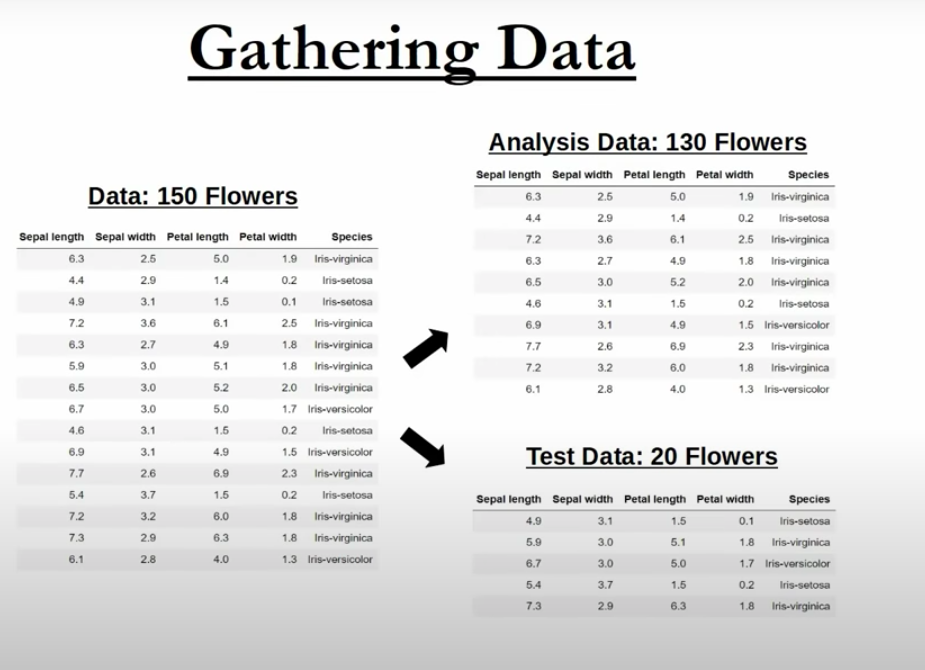

    

## Algorithm to be implemented

The algorithm that is going to be implemented looks like this:

<img src="https://raw.githubusercontent.com/SebastianMantey/Decision-Tree-from-Scratch/master/images/decision_tree_algorithm_1.png" width="350">

## API used to create Decision Tree

Let's first install the required packages and load the required libraries.


The goal of this notebook is to code a decision tree classifier that can be used with the following API:

```Python
df = pd.read_csv("data.csv")
train_df, test_df = train_test_split(df, test_size=0.2)
tree = decision_tree_algorithm(train_df)
accuracy = calculate_accuracy(test_df, tree)
```



Here, only first two APIs are used. First one for reading ` .csv ` file and second one for splitting database 
into training and test.

# Important Required Libaries 

Following Python libraries are used to build Decision Tree:


- **numpy** - a powerful library for scientific computing, particularly for handling N-dimensional arrays and performing linear algebra operations. Most of your data will be formated using numpy.

- **pandas**-Pandas is an open source Python library used for data science/data analysis and machine learning tasks. It is built on top of another library named Numpy, which provides support for multi-dimensional arrays. Most importantly data files are read using pandas

- **matplotlib** - includes visualization/plotting of data and images. Useful for inspecting data sets and visualizing results.

- **seaborn**  - Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

- **pprint** - The pprint module provides a capability to “pretty-print” arbitrary Python data structures in a well-formatted and more readable way


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt # Plotting library
import seaborn as sns # Plotting library

import random # for random values
from pprint import pprint # prityprint function for printing

Plotting interactively within an IPython notebook with `%matplotlib` command:

In [2]:
%matplotlib inline
sns.set_style("darkgrid")

# Load and Prepare Data

Let's first load the required `Iris dataset` read CSV function. You can download the data 
[here](https://www.kaggle.com/uciml/iris?select=Iris.csv)

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

**Content**

The datasets consists of several features of flowers as predictor variables and one target variable, Outcome. Predictor variables includes the number of species 

#### Format of the data
- the last column of the data frame must contain the label and it must also be called **"label"**
- there should be no missing values in the data frame

In [ ]:
df = pd.read_csv("Iris.csv")

In [4]:
df.head()

,Id,sepal_length,sepal_width,petal_length,petal_width,species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


We don't require `Id` column so we delete it. Also rename `species` to `label `

In [5]:
df = pd.read_csv("Iris.csv")
df = df.drop("Id",axis=1)
df = df.rename(columns={"species": "label"})

In [6]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


To check if there are any missing values, consider the following function: 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   label         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


**Note:** There are 150 entries and there are no null values so there are no missing values. 

# Train-Test-Split

## Explanation

`__________________________________________________________________________________________________________________`


**1.** To divide dataset into training and test data, `train_test_split()` is used. There are two input parameters: 
- `df` is a data frame 
- `test_size` specifies the size of the testing dataset. The default state suits the training size. It will be set to 0.25 if the training size is set to default.



This function gives output as  training data frame and test data frame 

`def train_test_split(df, test_size):`
  
  `-------`
  
  `-------`
  
  `-------`


 `return train_df, test_df`
 
 
Here from `Iris` dataset we have to choose randomly training and test dataframe 


**2.** Choose randomly index from `Iris` dataset. It can be done by using 

In [8]:
df.index.tolist()

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149]

Store this list to a variable called `indices`

In [9]:
indices=df.index.tolist()

**3.** Suppose we select 20 `index` randomly from `Iris` database. So we write `test_size` = 20 

Assign `indices` to `population` and `test_size` as variable `k`

In [10]:
test_size=20
random.sample(population=indices, k=test_size)


[48,
 130,
 36,
 75,
 50,
 148,
 73,
 125,
 140,
 99,
 110,
 17,
 42,
 131,
 64,
 35,
 14,
 66,
 132,
 29]

Assign the above statement to `test_indices`

In [11]:
test_size=20
test_indices= random.sample(population=indices, k=test_size)

**4.** Pandas provide a unique method to retrieve rows from a Data frame. 

`DataFrame.loc[]` method takes only index labels and returns feature values in that row in which index labels are prestent in dataframe.

In [16]:
df.loc[test_indices]

,sepal_length,sepal_width,petal_length,petal_width,label
126,6.2,2.8,4.8,1.8,Iris-virginica
115,6.4,3.2,5.3,2.3,Iris-virginica
108,6.7,2.5,5.8,1.8,Iris-virginica
75,6.6,3.0,4.4,1.4,Iris-versicolor
118,7.7,2.6,6.9,2.3,Iris-virginica
122,7.7,2.8,6.7,2.0,Iris-virginica
96,5.7,2.9,4.2,1.3,Iris-versicolor
146,6.3,2.5,5.0,1.9,Iris-virginica
71,6.1,2.8,4.0,1.3,Iris-versicolor
87,6.3,2.3,4.4,1.3,Iris-versicolor


**5.** From above we got **test data**. To get **training data**, remove indices present in training data. This is done using following function : 

In [19]:
df.drop(test_indices)

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.3,5.7,2.5,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Assign `df.loc[]` to `test_df` and `df.drop()` to `train_df`

In [21]:
test_df = df.loc[test_indices]
train_df = df.drop(test_indices)

**6.** Here we took `20` as `test_size` but if you want in terms of percentage of total population then we write
`test_size` equals `test_size` which is a proportion times the length of dataframe.

`test_size = test_size * len(df)`
                           

We have to `round` the righthand side because we can't have say 5.5 rows from dataframe.

 `test_size = round(test_size * len(df))`



**Finally combining 2.-6. and inserting into 1.:**

`__________________________________________________________________________________________________________________`

In [20]:
def train_test_split(df, test_size):
    
    if isinstance(test_size, float):
        test_size = round(test_size * len(df))

    indices = df.index.tolist()
    test_indices = random.sample(population=indices, k=test_size)

    test_df = df.loc[test_indices]
    train_df = df.drop(test_indices)
    
    return train_df, test_df

Next, if we choose `test_size` as `0.1` then we write

In [21]:
train_df, test_df = train_test_split(df, test_size=0.1)

In [22]:
len(df)

150

In [23]:
len(test_df)

15

Let's come back to `test_size` as `20`

In [24]:
train_df, test_df = train_test_split(df, test_size=20)

In [25]:
test_df.head()

,sepal_length,sepal_width,petal_length,petal_width,label
42,4.4,3.2,1.3,0.2,Iris-setosa
56,6.3,3.3,4.7,1.6,Iris-versicolor
96,5.7,2.9,4.2,1.3,Iris-versicolor
31,5.4,3.4,1.5,0.4,Iris-setosa
118,7.7,2.6,6.9,2.3,Iris-virginica


Note: we have randomly sampled so if we run again then we get different tuples:

In [26]:
train_df, test_df = train_test_split(df, test_size=20)
test_df.head()

,sepal_length,sepal_width,petal_length,petal_width,label
23,5.1,3.3,1.7,0.5,Iris-setosa
18,5.7,3.8,1.7,0.3,Iris-setosa
75,6.6,3.0,4.4,1.4,Iris-versicolor
145,6.7,3.0,5.2,2.3,Iris-virginica
141,6.9,3.1,5.1,2.3,Iris-virginica


To get same tuples of dataframe after running above code recursively, use following code: 

In [27]:
random.seed(0)
train_df, test_df = train_test_split(df, test_size=20)
test_df.head()

,sepal_length,sepal_width,petal_length,petal_width,label
98,5.1,2.5,3.0,1.1,Iris-versicolor
107,7.3,2.9,6.3,1.8,Iris-virginica
10,5.4,3.7,1.5,0.2,Iris-setosa
66,5.6,3.0,4.5,1.5,Iris-versicolor
130,7.4,2.8,6.1,1.9,Iris-virginica


In [28]:
random.seed(0)
train_df, test_df = train_test_split(df, test_size=20)
test_df.head()

,sepal_length,sepal_width,petal_length,petal_width,label
98,5.1,2.5,3.0,1.1,Iris-versicolor
107,7.3,2.9,6.3,1.8,Iris-virginica
10,5.4,3.7,1.5,0.2,Iris-setosa
66,5.6,3.0,4.5,1.5,Iris-versicolor
130,7.4,2.8,6.1,1.9,Iris-virginica
